# An early look at the kinematics

All redone in gaussian_mixture.ipynb

In [19]:
mira_file = '/local/scratch_2/jls/mira/v13/full_mira_list.csv'
from build_sample import *
mira = build_mira_sample(mira_file)

Fail IRAC: 11316 Fail parallax: 884 Fail JHK 10564 Fail DeltaCut 2036


/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name l is repeated in the output, new name l_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name b is repeated in the output, new name b_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name ra is repeated in the output, new name ra_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name dec is repeated in the output, new name dec_1 assigned
  'new name %s assigned') % (_n, curn))
/home/jls/work/data/gaiadr2/virac/mira_project/build_sample.py:466: RuntimeWarning: invalid value en

There are duplicates in the Engels compilation catalogue.


/home/jls/work/data/gaiadr2/virac/mira_project/../lmc/plrelations.py:21: RuntimeWarning: invalid value encountered in log10
  lp23=np.log10(p)-2.3
/home/jls/work/data/gaiadr2/virac/mira_project/../lmc/plrelations.py:35: RuntimeWarning: invalid value encountered in log10
  lp23=np.log10(p)-2.3


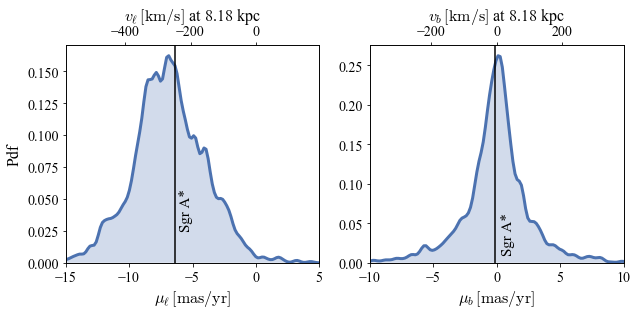

In [20]:
fltr = (np.abs(mira['b'])<0.5)
f,a=plt.subplots(1,2,figsize=[10.,4.])
plt.sca(a[0])
sns.kdeplot(mira['pml'].values[fltr],clip=[-15,5],bw=0.25,lw=3,shade=True)
plt.xlim(-15,5)
plt.ylabel('Pdf')
plt.axvline(-6.379,color='k')
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas}/\mathrm{yr}]$')
plt.annotate('Sgr A*', (-6.1,0.05),rotation=90,fontsize=15)
plt.gca().twiny()
plt.xlim(-15*4.74*8.18,5*4.74*8.18)
plt.xlabel(r'$v_\ell\,[\mathrm{km}/\mathrm{s}]$ at 8.18 kpc')
plt.sca(a[1])
sns.kdeplot(mira['pmb'].values[fltr],clip=[-10,10],bw=0.25,lw=3,shade=True)
plt.xlim(-10,10)
plt.axvline(-7.25/4.74/8.25,color='k')
plt.xlabel(r'$\mu_b\,[\mathrm{mas}/\mathrm{yr}]$')
plt.annotate('Sgr A*', (0.3,0.05),rotation=90,fontsize=15)
plt.gca().twiny()
plt.xlim(-10*4.74*8.18,10*4.74*8.18)
plt.xlabel(r'$v_b\,[\mathrm{km}/\mathrm{s}]$ at 8.18 kpc')
plt.savefig('plots/basic_kinematics.pdf', bbox_inches='tight')

In [128]:
gb_sample = get_ogle_gaia_mira(box_edge=2.5)

/home/jls/work/data/gaiadr2/virac/mira_project/../lmc/plrelations.py:21: RuntimeWarning: invalid value encountered in log10
  lp23=np.log10(p)-2.3
/home/jls/work/data/gaiadr2/virac/mira_project/../lmc/plrelations.py:35: RuntimeWarning: invalid value encountered in log10
  lp23=np.log10(p)-2.3


Text(0.5, 0, '$\\mu_b\\,[\\mathrm{mas\\,yr}^{-1}]$')

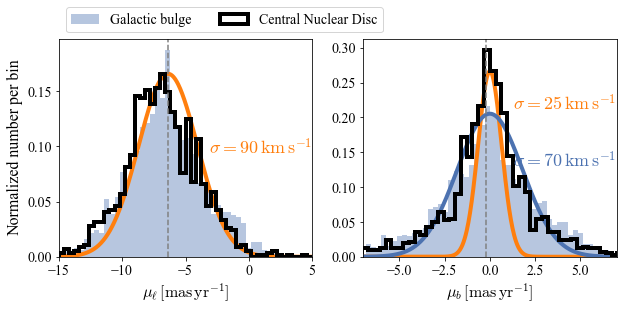

In [139]:
f,a=plt.subplots(1,2,figsize=[10.,4.])
plt.sca(a[0])

fltr = (gb_sample['epml']<3.)
nb,b,p=plt.hist(gb_sample['pml'][fltr],range=[-15,5],bins=50,
         normed=True,alpha=0.4,zorder=0,label='Galactic bulge');

fltr = (np.abs(mira['b'])<0.3)&(mira['epml']<3.)
plt.axvline(-6.379,color='gray',ls='dashed')
n,b,p=plt.hist(mira['pml'][fltr],bins=50,lw=4,histtype='step',normed=True,color='k',range=[-15,5],
         label='Central Nuclear Disc',zorder=2);
plt.xlim(-15,5)
xx = np.linspace(-15,15,1000)
sigma = 90.
sigmamu = sigma/(8.17*4.74)
plt.plot(xx,np.exp(-(xx+6.379)**2/2./sigmamu**2)*np.max(n),lw=4,color="#ff7f0e",zorder=1)

plt.annotate(r'$\sigma=%i\,\mathrm{km\,s}^{-1}$'%sigma,xy=(1.,0.5),xycoords='axes fraction', 
             ha='right',va='center',color="#ff7f0e",fontsize=18)

plt.ylabel('Normalized number per bin')
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas\,yr}^{-1}]$')

plt.legend(ncol=2,bbox_to_anchor=(0.,1.),loc='lower left')

plt.sca(a[1])
fltr = (gb_sample['epmb']<2.)
nb,b,p=plt.hist(gb_sample['pmb'][fltr],range=[-10,10],bins=70,
         normed=True,alpha=0.4,zorder=0,label='Galactic Bulge');

fltr = (np.abs(mira['b'])<0.3)&(mira['epmb']<2.)
plt.axvline(-7.25/8.17/4.74,color='gray',ls='dashed')
n,b,p=plt.hist(mira['pmb'][fltr],bins=50,lw=4,histtype='step',normed=True,color='k',range=[-8,8],
         label='Central Nuclear Disc',zorder=2);
plt.xlim(-7,7)
xx = np.linspace(-15,15,1000)
sigma = 25.
sigmamu = sigma/(8.17*4.74)
plt.plot(xx,np.exp(-xx**2/2./sigmamu**2)*n[len(n)//2],lw=4,color="#ff7f0e",zorder=1)
plt.annotate(r'$\sigma=%i\,\mathrm{km\,s}^{-1}$'%sigma,xy=(1.,0.7),xycoords='axes fraction', 
             ha='right',va='center',color="#ff7f0e",fontsize=18)
# plt.ylabel('Normalized number per bin')
sigma = 70.
sigmamu = sigma/(8.17*4.74)
plt.plot(xx,np.exp(-(xx)**2/2./sigmamu**2)*nb[len(nb)//2],lw=4,zorder=1,color=sns.color_palette()[0])
plt.annotate(r'$\sigma=%i\,\mathrm{km\,s}^{-1}$'%sigma,xy=(1.,0.44),xycoords='axes fraction', 
             ha='right',va='center',color=sns.color_palette()[0],fontsize=18)


plt.xlabel(r'$\mu_b\,[\mathrm{mas\,yr}^{-1}]$')

# plt.savefig('proper_motion_dist.pdf',bbox_inches='tight')

In [21]:
def age_function(period):
    return 6.5*(1.+np.tanh((330-period)/250.))
def inv_age_function(age):
    return 330.-np.arctanh((age/6.5)-1)*250.

In [22]:
from scipy.interpolate import UnivariateSpline
def logl(p,x,y,yerr2,Nnodes,pp):
    m = p[:Nnodes]
    lns = p[Nnodes:2*Nnodes]
    lneps,outlierm,outlierlns = p[2*Nnodes:]
    os2 = np.exp(outlierlns*2.)
    o = -.5*(y-outlierm)**2/(os2+yerr2)-.5*np.log(yerr2+os2)
    um = UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))
    ulns = UnivariateSpline(pp,lns,k=np.min([len(pp)-1,5]))
    m_, s2_ = um(x), np.exp(2*ulns(x))
    if(lneps>0 or np.any(s2_>os2)):
        return -np.inf
    return np.sum(logsumexp([np.log(1-np.exp(lneps))-.5*(y-m_)**2/(yerr2+s2_)-.5*np.log(yerr2+s2_),lneps+o],axis=0))-outlierlns

In [23]:
import emcee
Nnodes=8
nwalkers = (2*Nnodes+3)*2
pp = np.linspace(np.log10(80.),np.log10(1000.),Nnodes)
ndim = Nnodes*2+3
compt='l'
bcut=.3
fltr = (mira['pm%s'%compt]==mira['pm%s'%compt])&(np.abs(mira['pm%s'%compt])<np.nanstd(mira['pm%s'%compt].values)*3.)&(np.abs(mira['b'])<bcut)
em_l = emcee.EnsembleSampler(nwalkers=nwalkers,ndim=ndim, log_prob_fn=logl, 
                           args=(np.log10(mira['period'].values[fltr]), 
                                 mira['pm%s'%compt].values[fltr], 
                                 mira['epm%s'%compt].values[fltr]**2, Nnodes, pp, ),
                           threads=32)
p0 = np.concatenate([[np.nanmean(mira['pm%s'%compt].values)]*Nnodes,
                     [np.log(np.nanstd(mira['pm%s'%compt].values))]*Nnodes,
                     [-3,0,5]])
p0 = p0[:,np.newaxis]+np.random.normal(0.,0.1,size=(ndim, nwalkers))
rr_l=em_l.run_mcmc(p0.T,5000)

In [26]:
import emcee
Nnodes=8
nwalkers = (2*Nnodes+3)*2
pp = np.linspace(np.log10(80.),np.log10(1000.),Nnodes)
ndim = Nnodes*2+3
compt='b'
bcut=.3
fltr = (mira['pm%s'%compt]==mira['pm%s'%compt])&(np.abs(mira['pm%s'%compt])<np.nanstd(mira['pm%s'%compt].values)*3.)&(np.abs(mira['b'])<bcut)
em_b = emcee.EnsembleSampler(nwalkers=nwalkers,ndim=ndim, log_prob_fn=logl, 
                           args=(np.log10(mira['period'].values[fltr]), 
                                 mira['pm%s'%compt].values[fltr], 
                                 mira['epm%s'%compt].values[fltr]**2, Nnodes, pp, ),
                           threads=32)
p0 = np.concatenate([[np.nanmean(mira['pm%s'%compt].values)]*Nnodes,
                     [np.log(np.nanstd(mira['pm%s'%compt].values))]*Nnodes,
                     [-3,0,5]])
p0 = p0[:,np.newaxis]+np.random.normal(0.,0.1,size=(ndim, nwalkers))
rr_b=em_b.run_mcmc(p0.T,5000)

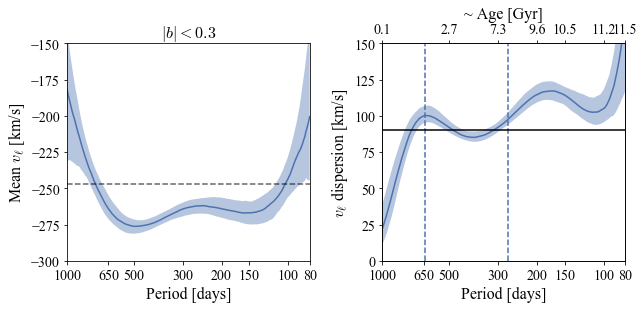

In [180]:
ppu = np.linspace(np.min(pp[0]),np.max(pp[-1]),200)
um = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_l.flatchain[:,:Nnodes][-15000:]])
us = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_l.flatchain[:,Nnodes:2*Nnodes][-15000:]]))

f,a=plt.subplots(1,2,figsize=[10.,4.],sharex=True)
plt.subplots_adjust(wspace=0.3)
plt.sca(a[0])
fac = 1./(8.178*4.74)
plt.title('$|b|<{0}$'.format(bcut),fontsize=16)
plt.fill_between(ppu,np.nanpercentile(np.array(um),16.,axis=0)/fac,np.nanpercentile(np.array(um),84.,axis=0)/fac,alpha=0.4)
plt.plot(ppu,np.nanmedian(np.array(um),axis=0)/fac)
# plt.axhline(-6.379,color='k')
plt.axhline(-6.379*4.74*8.18,color='k',ls='dashed',alpha=0.6)
plt.ylim(-300,-150)
plt.xlabel('Period [days]')
plt.ylabel('Mean $v_\ell$ [km/s]')
plt.sca(a[1])
plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0)/fac,np.nanpercentile(np.array(us),84.,axis=0)/fac,alpha=0.4)
plt.plot(ppu,np.nanmedian(np.array(us),axis=0)/fac)
# plt.axhline(-6.379,color='k')
plt.ylim(0.,150.)
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),np.log10(650.),3],[80,100,150,200,300,500,650,1000]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('Period [days]')
plt.ylabel('$v_\ell$ dispersion [km/s]')
plt.twiny()
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),3],
           ['%0.1f'%age_function(x) for x in [80,100,150,200,300,500,1000]]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('~ Age [Gyr]')
plt.axvline(np.log10(inv_age_function(8.)),ls='dashed')
plt.axvline(np.log10(inv_age_function(1.)),ls='dashed')

plt.axhline(90.,color='k')

In [299]:
mira['maser_rv'] = mira['maser_OH_rv'].copy()
mira.loc[mira['maser_SiO_rv']>-300, 'maser_rv'] = mira['maser_SiO_rv'][mira['maser_SiO_rv']>-300]

In [317]:
import emcee
Nnodes=8
nwalkers = (2*Nnodes+3)*2
pp = np.linspace(-1.5,1.5,Nnodes)
ndim = Nnodes*2+3
compt='b'
bcut=.3
fltr = (mira['pm%s'%compt]==mira['pm%s'%compt])&(np.abs(mira['pm%s'%compt])<np.nanstd(mira['pm%s'%compt].values)*3.)&(np.abs(mira['b'])<bcut)
fltr &= (np.abs(mira['maser_rv'])<200)
print(np.count_nonzero(fltr))
em_b_l = emcee.EnsembleSampler(nwalkers=nwalkers,ndim=ndim, log_prob_fn=logl, 
                           args=(wrap(mira['l'].values[fltr]), 
                                 mira['pm%s'%compt].values[fltr], 
                                 mira['epm%s'%compt].values[fltr]**2, Nnodes, pp, ),
                           threads=32)
p0 = np.concatenate([[np.nanmean(mira['pm%s'%compt].values)]*Nnodes,
                     [np.log(np.nanstd(mira['pm%s'%compt].values))]*Nnodes,
                     [-3,0,5]])
p0 = p0[:,np.newaxis]+np.random.normal(0.,0.1,size=(ndim, nwalkers))
rr_b_l=em_b_l.run_mcmc(p0.T,25000)

107


/data/jls/python3.5/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/data/jls/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [318]:
em_vlos_l = emcee.EnsembleSampler(nwalkers=nwalkers,ndim=ndim, log_prob_fn=logl, 
                           args=(wrap(mira['l'].values[fltr]), 
                                 mira['maser_rv'].values[fltr], 
                                 np.ones_like(mira['maser_rv'].values[fltr]), Nnodes, pp, ),
                           threads=32)
p0 = np.concatenate([[np.nanmean(mira['pm%s'%compt].values)]*Nnodes,
                     [np.log(100.)]*Nnodes,
                     [-3,0,5]])
p0 = p0[:,np.newaxis]+np.random.normal(0.,0.1,size=(ndim, nwalkers))
rr_vlos_l=em_vlos_l.run_mcmc(p0.T,25000)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


(-1.0, 1.0)

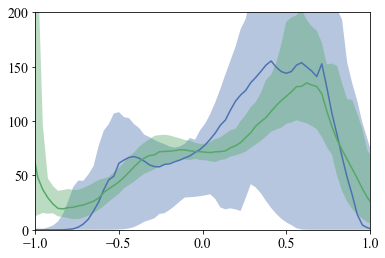

In [329]:
ppu = np.linspace(np.min(pp[0]),np.max(pp[-1]),100)
um = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b_l.flatchain[:,:Nnodes][-1500:]])
us = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b_l.flatchain[:,Nnodes:2*Nnodes][-1500:]]))

# plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0)/fac,np.nanpercentile(np.array(us),84.,axis=0)/fac,alpha=0.4)
# plt.plot(ppu,np.nanmedian(np.array(us),axis=0)/fac)

um_2 = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_vlos_l.flatchain[:,:Nnodes][-1500:]])
us_2 = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_vlos_l.flatchain[:,Nnodes:2*Nnodes][-1500:]]))

# plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0),np.nanpercentile(np.array(us),84.,axis=0),alpha=0.4)
# plt.plot(ppu,np.nanmedian(np.array(us),axis=0))

plt.plot(ppu, np.nanmedian(np.array(us)/fac,axis=0))
plt.fill_between(ppu,np.nanpercentile(np.array(us)/fac,16.,axis=0),
                 np.nanpercentile(np.array(us)/fac,84.,axis=0),alpha=0.4)
plt.plot(ppu, np.nanmedian(np.array(us_2),axis=0))
plt.fill_between(ppu,np.nanpercentile(np.array(us_2),16.,axis=0),
                 np.nanpercentile(np.array(us_2),84.,axis=0),alpha=0.4)


plt.ylim(0.,200.)
plt.xlim(-1.,1.)

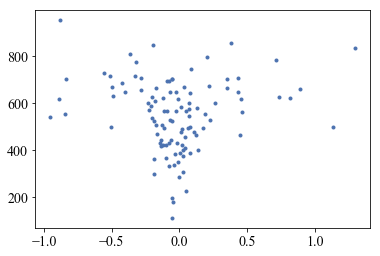

In [333]:
plt.plot(wrap(mira['l'])[fltr], mira['period'][fltr],'.')

/data/jls/python3.5/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/data/jls/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


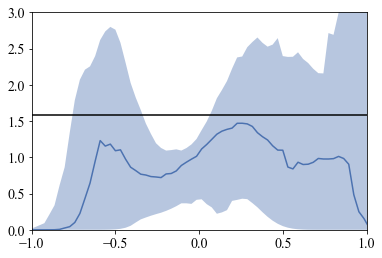

In [334]:
ppu = np.linspace(np.min(pp[0]),np.max(pp[-1]),100)
um = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b_l.flatchain[:,:Nnodes][-1500:]])
us = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b_l.flatchain[:,Nnodes:2*Nnodes][-1500:]]))

# plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0)/fac,np.nanpercentile(np.array(us),84.,axis=0)/fac,alpha=0.4)
# plt.plot(ppu,np.nanmedian(np.array(us),axis=0)/fac)

um_2 = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_vlos_l.flatchain[:,:Nnodes][-1500:]])
us_2 = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_vlos_l.flatchain[:,Nnodes:2*Nnodes][-1500:]]))

# plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0),np.nanpercentile(np.array(us),84.,axis=0),alpha=0.4)
# plt.plot(ppu,np.nanmedian(np.array(us),axis=0))

plt.plot(ppu, np.nanmedian(np.array(us)/fac/np.array(us_2),axis=0))
plt.fill_between(ppu,np.nanpercentile(np.array(us)/fac/np.array(us_2),16.,axis=0),
                 np.nanpercentile(np.array(us)/fac/np.array(us_2),84.,axis=0),alpha=0.4)


plt.ylim(0.,3.)
plt.xlim(-1.,1.)
plt.axhline(1./np.sqrt(0.4),color='k')

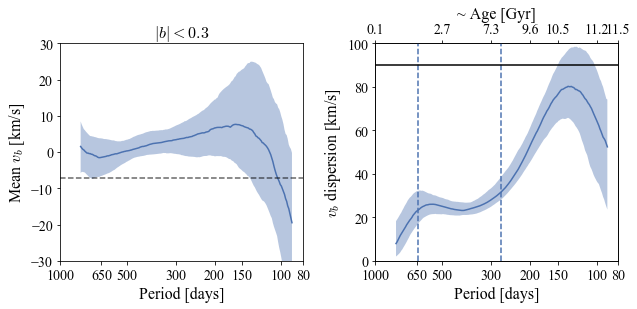

In [157]:
ppu = np.linspace(*np.log10(np.nanpercentile(mira['period'][fltr],[0.5,99.5])),200)
um = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b.flatchain[:,:Nnodes][-15000:]])
us = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b.flatchain[:,Nnodes:2*Nnodes][-15000:]]))

f,a=plt.subplots(1,2,figsize=[10.,4.],sharex=True)
plt.subplots_adjust(wspace=0.3)
plt.sca(a[0])
fac = 1./(8.178*4.74)
plt.title('$|b|<{0}$'.format(bcut),fontsize=16)
plt.fill_between(ppu,np.nanpercentile(np.array(um),16.,axis=0)/fac,np.nanpercentile(np.array(um),84.,axis=0)/fac,alpha=0.4)
plt.plot(ppu,np.nanmedian(np.array(um),axis=0)/fac)
# plt.axhline(-6.379,color='k')
plt.axhline(-7.25,color='k',ls='dashed',alpha=0.6)
plt.ylim(-30,30)
plt.xlabel('Period [days]')
plt.ylabel('Mean $v_b$ [km/s]')
plt.sca(a[1])
plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0)/fac,np.nanpercentile(np.array(us),84.,axis=0)/fac,alpha=0.4)
plt.plot(ppu,np.nanmedian(np.array(us),axis=0)/fac)
# plt.axhline(-6.379,color='k')
plt.ylim(0.,100.)
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),np.log10(650.),3],[80,100,150,200,300,500,650,1000]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('Period [days]')
plt.ylabel('$v_b$ dispersion [km/s]')
plt.twiny()
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),3],
           ['%0.1f'%age_function(x) for x in [80,100,150,200,300,500,1000]]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('~ Age [Gyr]')
plt.axvline(np.log10(inv_age_function(8.)),ls='dashed')
plt.axvline(np.log10(inv_age_function(1.)),ls='dashed')

xx = np.linspace(0.1,8.)
# plt.plot(np.log10(inv_age_function(xx)), 22.*xx**0.2, color='k')

plt.axhline(90.,color='k')
# plt.axvline(np.log10(np.nanpercentile(mira['period'][fltr],99.5)))

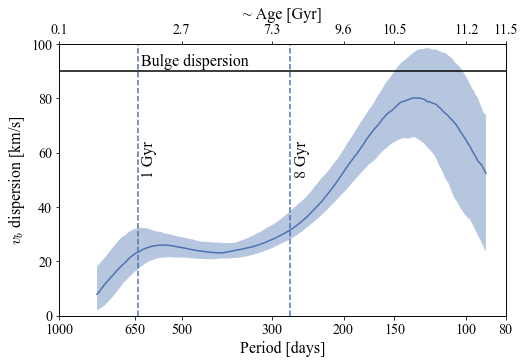

In [45]:
ppu = np.linspace(*np.log10(np.nanpercentile(mira['period'][fltr],[0.5,99.5])),200)
um = np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b.flatchain[:,:Nnodes][-15000:]])
us = np.exp(np.array([UnivariateSpline(pp,m,k=np.min([len(pp)-1,5]))(ppu) for m in em_b.flatchain[:,Nnodes:2*Nnodes][-15000:]]))

f = plt.figure(figsize=[8,5.])
fac = 1./(8.178*4.74)
plt.fill_between(ppu,np.nanpercentile(np.array(us),16.,axis=0)/fac,np.nanpercentile(np.array(us),84.,axis=0)/fac,alpha=0.4)
plt.plot(ppu,np.nanmedian(np.array(us),axis=0)/fac)
# plt.axhline(-6.379,color='k')
plt.ylim(0.,100.)
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),np.log10(650.),3],[80,100,150,200,300,500,650,1000]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('Period [days]')
plt.ylabel('$v_b$ dispersion [km/s]')
plt.twiny()
plt.xticks([np.log10(80.),2,np.log10(150),np.log10(200.),np.log10(300),np.log10(500),3],
           ['%0.1f'%age_function(x) for x in [80,100,150,200,300,500,1000]]);
plt.xlim(np.log10(80.),np.log10(1000.))
plt.gca().invert_xaxis()
plt.xlabel('~ Age [Gyr]')
plt.axvline(np.log10(inv_age_function(8.)),ls='dashed')
plt.axvline(np.log10(inv_age_function(1.)),ls='dashed')
plt.annotate('1 Gyr', (np.log10(630),60), xycoords='data', rotation=90, fontsize=16)
plt.annotate('8 Gyr', (np.log10(265),60), xycoords='data', rotation=90, fontsize=16)
plt.annotate('Bulge dispersion', (np.log10(630),92), xycoords='data', fontsize=16)

xx = np.linspace(0.1,8.)
# plt.plot(np.log10(inv_age_function(xx)), 22.*xx**0.2, color='k')

plt.axhline(90.,color='k')

plt.savefig('plots/age_vdisp_relation.pdf', bbox_inches='tight')
# plt.axvline(np.log10(np.nanpercentile(mira['period'][fltr],99.5)))

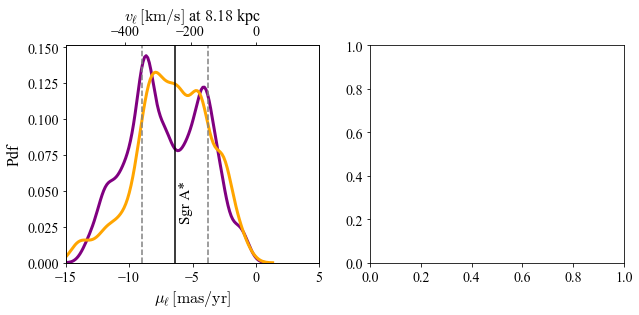

In [124]:
f,a=plt.subplots(1,2,figsize=[10.,4.])
plt.sca(a[0])
sns.kdeplot(mira['pml'].values[(np.abs(mira['b'])<0.25)&(mira['period']>400.)
                     &(np.abs(wrap(mira['l']))<0.15)&(np.abs(wrap(mira['l']))>0.0)],clip=[-15,0],bw=0.6,lw=3,
           color='purple')
sns.kdeplot(mira['pml'].values[(np.abs(mira['b'])<0.25)&(mira['period']<400.)
                     &(np.abs(wrap(mira['l']))<0.15)&(np.abs(wrap(mira['l']))>0.0)],clip=[-15,0],bw=0.6,lw=3,
           color='orange')

# sns.kdeplot(mira['pml'][(np.abs(mira['b'])<0.25)&betw(mira['period'],300.,650.)],clip=[-15,5],bw=0.5)
plt.xlabel(r'$\mu_\ell\,[\mathrm{mas}/\mathrm{yr}]$')
plt.ylabel('Pdf')
plt.xlim(-15,5)

plt.axvline(-6.379,color='k')
plt.axvline(-6.379-100./(4.74*8.18),color='gray',ls='dashed')
plt.axvline(-6.379+100./(4.74*8.18),color='gray',ls='dashed')
plt.annotate('Sgr A*', (-6.1,0.05),rotation=90,fontsize=15)
plt.gca().twiny()
plt.xlim(-15*4.74*8.18,5*4.74*8.18)
plt.xlabel(r'$v_\ell\,[\mathrm{km}/\mathrm{s}]$ at 8.18 kpc')
plt.savefig('plots/kinematics_split_400.pdf',bbox_inches='tight')

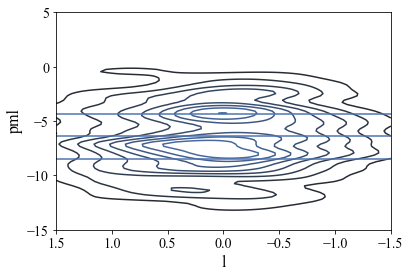

In [187]:
sns.kdeplot(wrap(mira['l'][(np.abs(mira['b'])<0.3)&(mira['period']<250.)]),
            mira['pml'][(np.abs(mira['b'])<0.3)&(mira['period']<250.)],clip=[[-1.5,1.5],[-15,5]],bw=0.4)
plt.axhline(-6.379)
plt.axhline(-6.379-80./(4.74*8.18))
plt.axhline(-6.379+80./(4.74*8.18))
plt.gca().invert_xaxis()

In [125]:
np.count_nonzero(mira['maser_SiO_rv']>-1000)

69

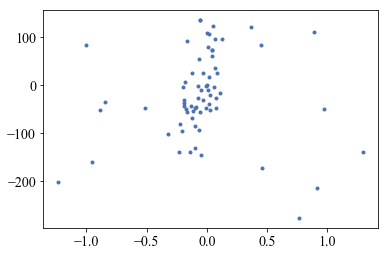

In [126]:
plt.plot(wrap(np.abs(mira['l'])),mira['maser_SiO_rv'],'.')

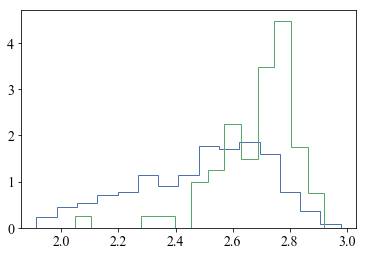

In [133]:
plt.hist(np.log10(mira['period']),density=True,histtype='step',bins=15)
plt.hist(np.log10(mira['period'][mira['maser_SiO_rv']>-1000]),density=True,histtype='step',bins=15);